# CoppeliaSim - CalcUABlator

## Import libraries:

In [1]:
import sim
import numpy as np
import cv2                             # opencv
import matplotlib.pyplot as plt        # pyplot
import time

## Establish the connection:

In [2]:
def connect(port):
# Establishes the connection to COPPELIA
# The port must match the connection port in COPPELIA -- PRESS PLAY in Coppelia Scene!!!
# returns the client number or -1 if the connection cannot be established
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("connect to ", port)
    else: print("Can not connect ")
    return clientID

In [3]:
# Connect to the COPPELIA server
# *** It must be executed every time the simulation is restarted ***
# Remember press PLAY before in coppelia scene
clientID = connect(19999)

connect to  19999


<h3> We get the handlers: </h3>
A handler is an identifier number that Coppelia assigns to each of the elements in the scene.

In [4]:
# We obtain the controllers for each of the robot's joints (Called joint1 and joint2 in the scenne)
retCode, joint1=sim.simxGetObjectHandle(clientID,'Joint_DC1',sim.simx_opmode_blocking)                  # DC1
retCode, joint2=sim.simxGetObjectHandle(clientID,'Joint_DC2',sim.simx_opmode_blocking)                  # DC2
retCode, joint3=sim.simxGetObjectHandle(clientID,'Joint_ServoMotor',sim.simx_opmode_blocking)           # Servomotor
retCode, sensorHandle=sim.simxGetObjectHandle(clientID,'Raspberry_Pi_Cam_V2',sim.simx_opmode_blocking)  # Raspberry Py Cam V2 8MP
print(joint1, joint2, joint3) # Position of the joints

17 19 21


## We move the SCARA:

In [5]:
# we send the position of joint1 (-30º), in radians.
q1 = -30 * np.pi/180
returnCode = sim.simxSetJointTargetPosition(clientID, joint1, q1, sim.simx_opmode_oneshot)
print(returnCode)

1


In [6]:
# we send the position of joint2 (30º), in radians.
q2 = 30 * np.pi/180
returnCode = sim.simxSetJointTargetPosition(clientID, joint2, q2, sim.simx_opmode_oneshot)
print(returnCode)

1


In [7]:
# we send the position of joint2 (30º), in radians.
q3 = 30 * np.pi/180
returnCode = sim.simxSetJointTargetPosition(clientID, joint3, q3, sim.simx_opmode_oneshot)
print(returnCode)

1


## Vision Sensor:

In [8]:
time.sleep(3)

In [9]:
# We obtain the image from the Camera Sensor
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
len(image)

24245760

In [10]:
resolution

[3280, 2464]

In [11]:
#It is an image with a resolution of 3280*2464 and each pixel is RGB
3280*2464*3

24245760

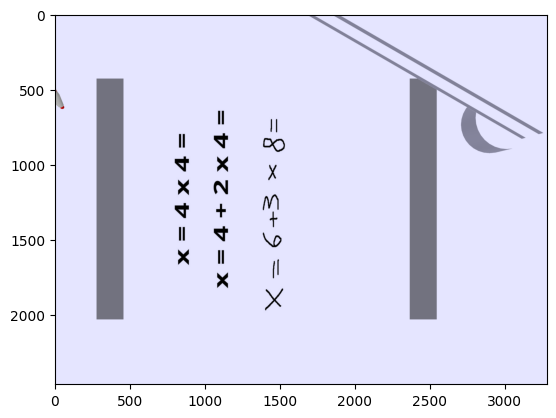

In [12]:
image = np.array(image)
image = image.astype(np.uint8)
img=np.array(abs(image),dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
img = cv2.flip(img, 1)                             # So it is not like a mirror
plt.imshow(img)
plt.show()

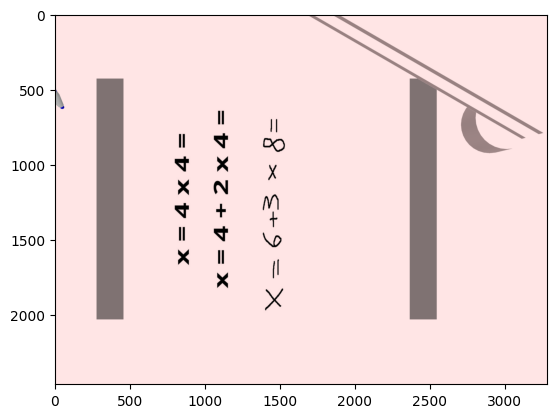

In [13]:
#CV library in Python can only work on BGR, GRAY or binarized images
img_BGR = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_BGR)
plt.show()

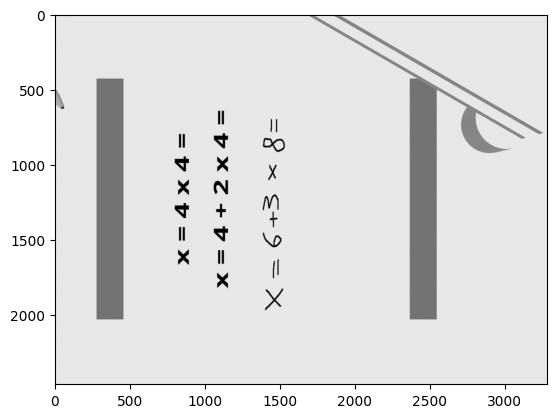

In [14]:
img_GRAY = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_GRAY, cmap='gray', vmin=0,vmax=255)
plt.show()

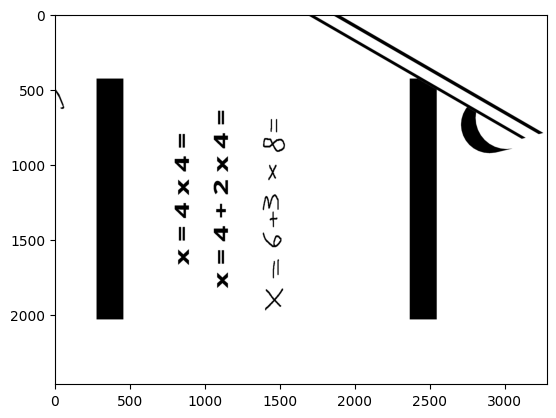

In [15]:
ret, thresh = cv2.threshold(img_GRAY,150,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray', vmin=0,vmax=255)
plt.show()

In [16]:
#We can also use a function to automatically detect blobs directly with SimpleBlobDetector
# the BGR, GRAY or binarized image can be used directly

#def init_blob_detector():
# params = cv2.SimpleBlobDetector_Params()
# params.minThreshold = 1
# params.maxThreshold = 255
# params.filterByArea = True
# params.minArea = 1
# params.filterByCircularity = False
# params.filterByConvexity = False
# params.filterByInertia = False

detector=cv2.SimpleBlobDetector_create() #Verion antigua !!
keypoints=detector.detect(thresh)
print(keypoints)

()


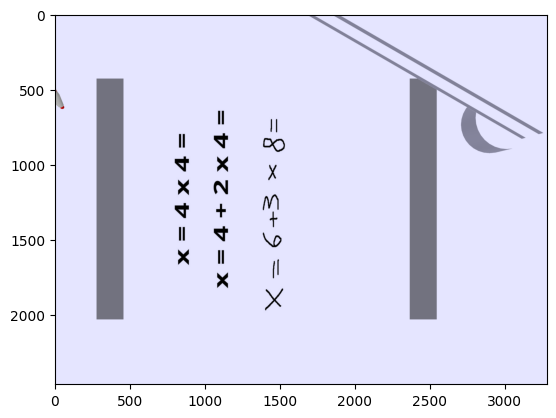

In [17]:
#image with blobs and marks
imagen_with_keypoints=cv2.drawKeypoints(img_BGR,keypoints,np.array([]),(0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#show image with keypoints
plt.imshow(cv2.cvtColor(imagen_with_keypoints,cv2.COLOR_BGR2RGB))

In [18]:
xi,yi,si=0,0,0
print ('blobs found:')
print (len(keypoints))

blobs found:
0
